## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1230]:
import pandas as pd
import os

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [1231]:
# your code here
os.chdir("/Users/seh9/Desktop/iad-intro-ds/2022/homeworks/hw03-EDA")
data = pd.read_csv('german_credit.csv')
data

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
..                                          ...       ...   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    2799   
2    no credits taken/all credits paid back duly           retraining     841   
3        all credits at this bank paid back duly               others    2122   
4        all credits at this bank paid back duly               others    2171   
..                                           ...                  ...     ...   
995  no credits taken/all credits paid back duly  furniture/equipment    1987   
996  no credits taken/all credits paid back duly               others    2303   
997      all credits at this bank paid back duly               others   12680   
998  no credits taken/all credits paid back duly  furniture/equipment    6468   
999  no credits taken/all credits paid back duly           car (used)    6350   

                        savings employment_duration installment_rate  \
0    unknown/no savings account              < 1 yr             < 20   
1    unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2                 ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3    unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4    unknown/no savings account    1 <= ... < 4 yrs             < 20   
..                          ...                 ...              ...   
995  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
996  unknown/no savings account            >= 7 yrs             < 20   
997              ... >= 1000 DM            >= 7 yrs             < 20   
998              ... >= 1000 DM          unemployed   25 <= ... < 35   
999              ... >= 1000 DM            >= 7 yrs             < 20   

                      personal_status_sex other_debtors  ...  \
0    female : non-single or male : single          none  ...   
1                  male : married/widowed          none  ...   
2    female : non-single or male : single          none  ...   
3                  male : married/widowed          none  ...   
4                  male : married/widowed          none  ...   
..                                    ...           ...  ...   
995                male : married/widowed          none  ...   
996                male : married/widowed  co-applicant  ...   
997                male : married/widowed          none  ...   
998                male : married/widowed          none  ...   
999                male : married/widowed          none  ...   

                  property age  other_installment_plans   housing  \
0             car or other  21                     none  for free   
1    unknown / no property  36                     none  for free   
2    unknown / no property  23                     none  for free   
3    unknown / no property  39                     none  for free   
4             car or other  38                     bank      rent   
..                     ...  ..                      ...       ...   
995  unknown / no property  21                     none  for free   
996  unknown / no property  45                     none      rent   
997            real estate  30                     none       own   
998        

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [1232]:
data.isna().any().any()

False

In [1233]:
data["present_residence"].value_counts()

>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64

In [1234]:
#Пропусков в данных нет. Сверху проверка наличия NaN - ответ false значит таких нет
#Также в ручную проверил каждый столбец через value_counts() и пропусков типа стринг тоже нет
# Количественные: duration, amount, age - 3
# Бинарные: credit_risk, foreigh_worker, telephone, people_liable - 4
# Порядковые: number_credits, installment_rate, employment_duration, savings, status, present_residence - 6
# Категориальные: job, housing, other_installment_plans, property, other_debtors, personal_status_sex, purpose,
# credit_history - 8 

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [1236]:
gr = data.groupby("personal_status_sex").agg(("amount"))
gr.mean()

personal_status_sex
female : non-single or male : single    2877.783871
female : single                         2045.543478
male : divorced/separated               3684.700000
male : married/widowed                  3661.879562
Name: amount, dtype: float64

### Задание 4 (0.5 балла)

Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [1237]:
a = sum((data["age"] < 30) & (data["housing"] == "rent")) / sum(data["age"] < 30) * 100
b = sum((data["age"] > 40) & (data["housing"] == "rent")) / sum(data["age"] > 40) * 100
a,b

(66.66666666666666, 68.01470588235294)

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [1238]:
data[(data["foreign_worker"] == "yes") & ((data["number_credits"] == "4-5") | (data["number_credits"] == ">= 6"))]

status  duration                           credit_history  \
213  0<= ... < 200 DM         6  all credits at this bank paid back duly   

    purpose  amount                     savings employment_duration  \
213  others    1299  unknown/no savings account    1 <= ... < 4 yrs   

    installment_rate     personal_status_sex other_debtors  ...  \
213            >= 35  male : married/widowed          none  ...   

                  property age  other_installment_plans housing  \
213  unknown / no property  74                     none    rent   

    number_credits                                  job people_liable  \
213            4-5  unemployed/unskilled - non-resident     3 or more   

    telephone foreign_worker credit_risk  
213        no            yes        good  

[1 rows x 21 columns]

### Задание 6 (1 балл)

In [1239]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

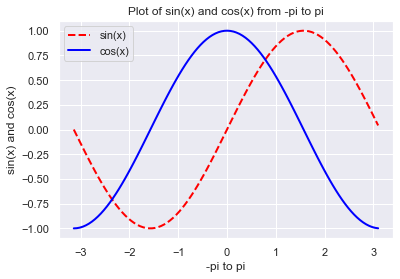

In [1240]:
x = np.arange(-np.pi,np.pi,0.0618) 
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y, linestyle = '--', linewidth = 2, color = 'red')
plt.plot(x,z, linestyle = '-', linewidth = 2, color = 'blue')
plt.xlabel('-pi to pi')  
plt.ylabel('sin(x) and cos(x)')
plt.title('Plot of sin(x) and cos(x) from -pi to pi')
plt.legend(['sin(x)', 'cos(x)'])   
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

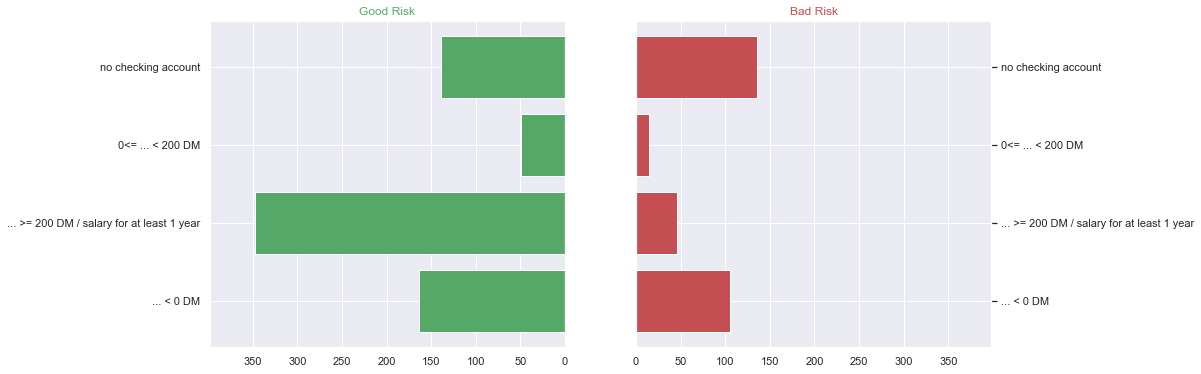

In [1241]:
df_good = data[data.credit_risk == 'good'].groupby('status')['credit_risk'].count() 
y = np.array(df_good.index) 
x1 = df_good.values 
df_bad = data[data.credit_risk == 'bad'].groupby('status')['credit_risk'].count() 
x2 = df_bad.values 

fi1, fig = plt.subplots(1, 2, figsize=(14, 6)) 

fig[0].set_xlim([0, max(x1.max(), x2.max()) + 50]) 
fig[0].set_title('Good Risk', color='g')
fig[0].barh(y, x1, color='g') 
fig[0].invert_xaxis() 

fig[1].set_xlim([0, max(x1.max(), x2.max()) + 50])  
fig[1].set_title('Bad Risk', color='r') 
fig[1].barh(y, x2, color='r') 
fig[1].yaxis.tick_right()

### Задание 8  (0.5 балла)

In [1242]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

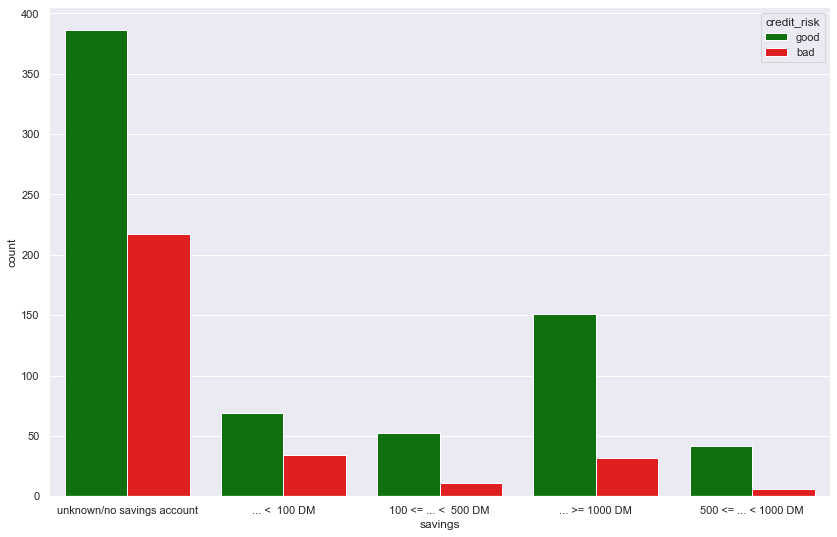

In [1243]:
plt.figure(figsize=(14,9))
sns.countplot(x='savings', hue='credit_risk', data=data, palette = colors)
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<function matplotlib.pyplot.show(close=None, block=None)>

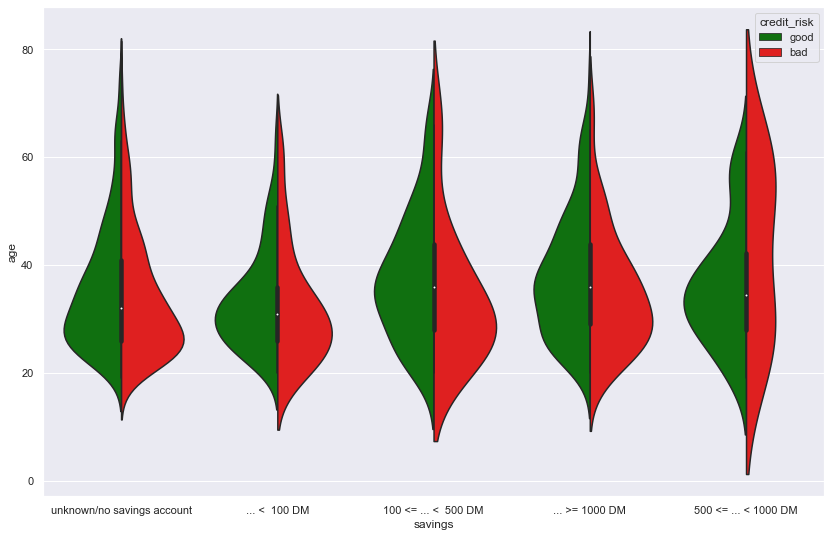

In [1244]:
plt.figure(figsize = (14,9))
sns.violinplot(x="savings", y="age", hue="credit_risk",
                        data=data, palette=colors, split=True)
                        
plt.show

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

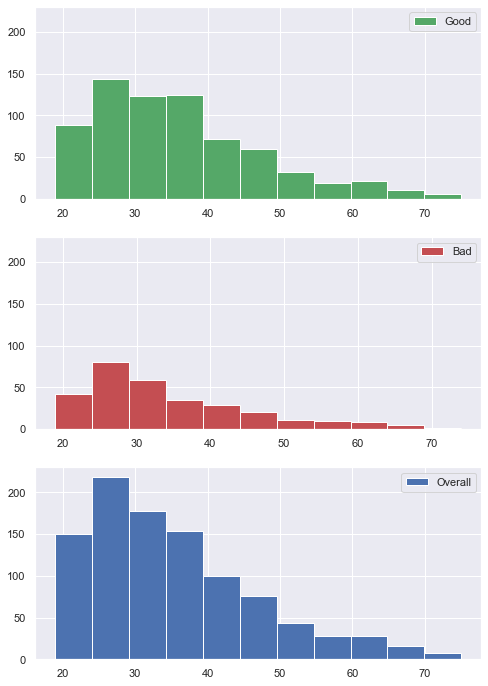

In [1245]:
good = data[data['credit_risk'] == "good"]["age"]
bad = data[data['credit_risk'] == "bad"]["age"]

ab,fig = plt.subplots(3, 1, figsize=(8, 12)) 

fig[0].set_ylim(0, 230)
fig[0].hist(good,bins = 11, color = 'g')

fig[1].set_ylim(0, 230)
fig[1].hist(bad,bins = 11, color = 'r')

fig[2].set_ylim(0, 230)
fig[2].hist(data['age'],bins = 11)

fig[0].legend(["Good"])
fig[1].legend(["Bad"])
fig[2].legend(["Overall"])

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

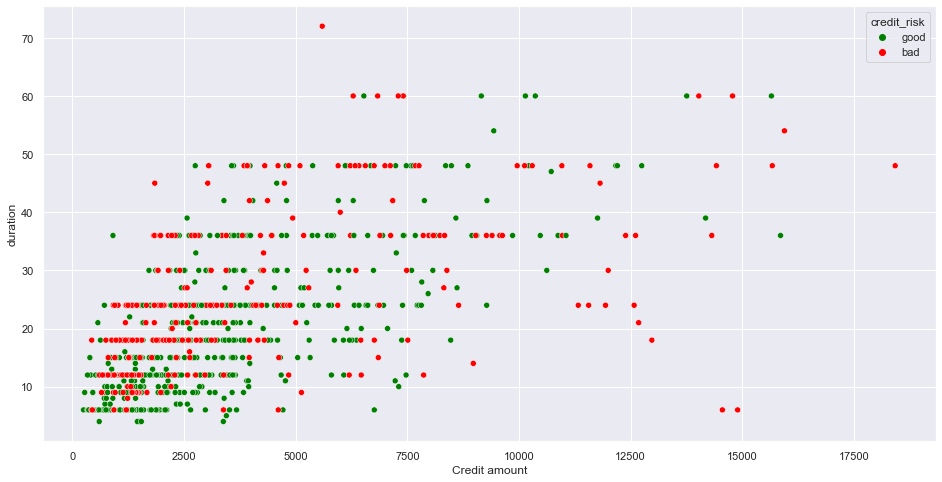

In [1246]:
plt.figure(figsize = (16,8))
sns.scatterplot(data=data, x="amount", y="duration", hue = "credit_risk", palette = colors)
plt.xlabel("Credit amount")
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

<Figure size 432x288 with 0 Axes>

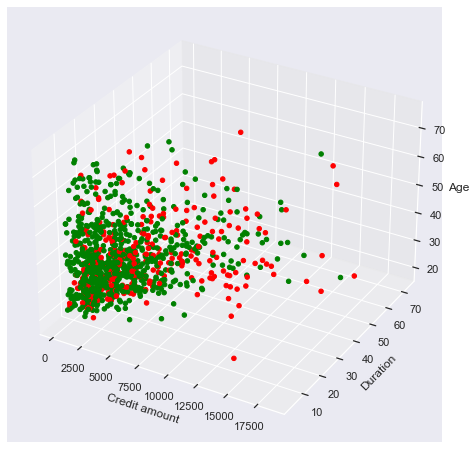

In [1251]:
from matplotlib.colors import ListedColormap

fig = plt.figure()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

pl = (data["credit_risk"] == "good")

x = data['amount']
y = data['duration']
z = data['age']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

colors_r = ['#FF0000', '#008000'] 
cmap = ListedColormap(sns.color_palette(colors_r, 256).as_hex())

sc = ax.scatter(x, y, z, c = pl, marker='o', alpha = 1, cmap = cmap)
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [1252]:
data['employment_duration'].value_counts()

1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64

In [1253]:
# удаление категориальных столбцов 
category = ["job", "housing", "other_installment_plans", "property", "other_debtors", "personal_status_sex", "purpose", "credit_history"]
data.drop(columns = category, axis = 1, inplace= True) 

# закодируем вручную бинарные и порядковые столбцы для ясности
data["credit_risk"] = data["credit_risk"].map({'good': 1, 'bad': 0})
data["foreign_worker"] = data["foreign_worker"].map({'yes': 1, 'no': 0})
data["telephone"] = data["telephone"].map({'yes (under customer name)': 1, 'no': 0})
data["people_liable"] = data["people_liable"].map({'0 to 2': 0, '3 or more': 1})
data["number_credits"] = data["number_credits"].map({'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3})
data["present_residence"] = data["present_residence"].map({'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3})
data["installment_rate"] = data["installment_rate"].map({'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3})
data["employment_duration"] = data["employment_duration"].map({'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4})
data["savings"] = data["savings"].map({'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4})
data["status"] = data["status"].map({'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3})

data

status  duration  amount  savings  employment_duration  installment_rate  \
0         0        18    1049        0                    1                 0   
1         0         9    2799        0                    2                 2   
2         1        12     841        1                    3                 2   
3         0        12    2122        0                    2                 1   
4         0        12    2171        0                    2                 0   
..      ...       ...     ...      ...                  ...               ...   
995       0        24    1987        0                    2                 2   
996       0        24    2303        0                    4                 0   
997       3        21   12680        4                    4                 0   
998       1        12    6468        4                    0                 2   
999       0        30    6350        4                    4                 0   

     present_residence  age  number_credits  people_liable  telephone  \
0                    3   21               0              0          0   
1                    1   36               1              1          0   
2                    3   23               0              0          0   
3                    1   39               1              1          0   
4                    3   38               1              0          0   
..                 ...  ...             ...            ...        ...   
995                  3   21               0              1          0   
996                  0   45               0              0          0   
997                  3   30               0              0          1   
998                  0   52               0              0          1   
999                  3   31               0              0          0   

     foreign_worker  credit_risk  
0                 0            1  
1                 0            1  
2                 0            1  
3                 1            1  
4                 1            1  
..              ...          ...  
995               0            0  
996               0            0  
997               0            0  
998               0            0  
999               0            0  

[1000 rows x 13 columns]

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

<AxesSubplot:>

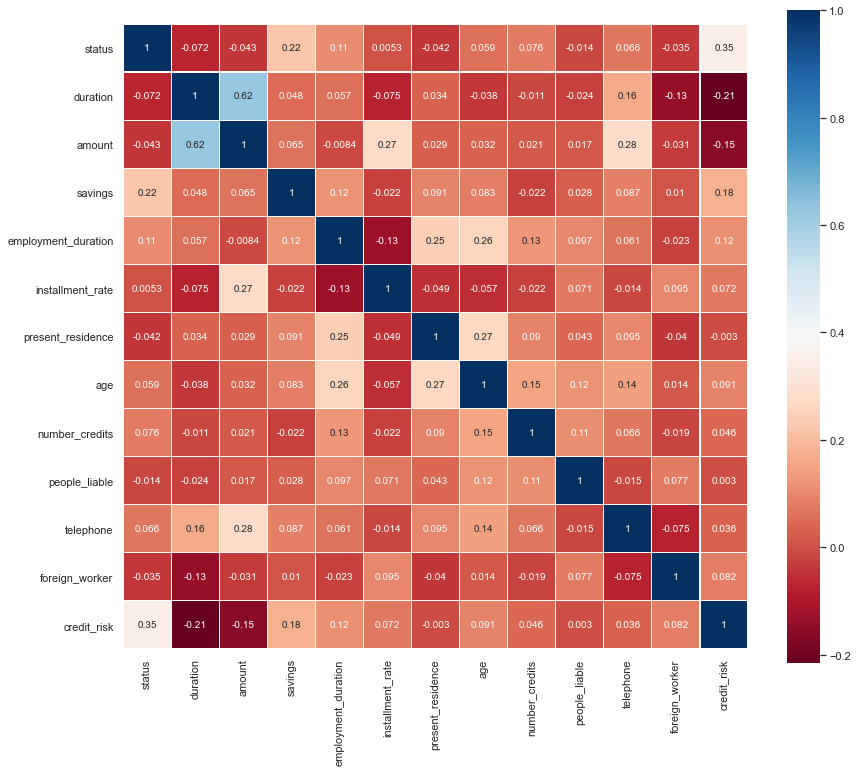

In [1254]:
# построим хитмап для определения наиболее важных признаков
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap='RdBu', linecolor='white', annot=True)

In [1255]:
from sklearn import preprocessing


def predict(Xtest: np.array) -> np.array:
    return Xtest.dot([0.56, # status
                      0.23, # duration
                      0.02, # amount
                      0.30, # savings
                      0.15, # employment_duration
                      0.12, # installment_rate
                      0.12, # present_residence --
                      0.02, # age
                      0.02, # number_credits
                      0.1, # people_liable --
                      0.1, # telephone
                      0.1]).round() # foreign_worker

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Нормализируем данные
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)

accuracy_score(y_test, predict(X_test))

0.708